# Breast Cancer Dataset — Exploration

Цель:
- исследовать данные
- подготовить признаки для логистической регрессии
- понять распределения и целевую переменную

In [11]:
import sys
import os

sys.path.append(os.path.abspath(".."))

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sns.set_theme(style="whitegrid")

In [2]:
PROJECT_ROOT = Path.cwd().parent

DATA_DIR = PROJECT_ROOT / "data" / "raw"
DATA_DIR.mkdir(parents=True, exist_ok=True)

data = load_breast_cancer(as_frame=True)

df = pd.concat(
    [data.data, data.target.rename("target")],
    axis=1
)

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [42]:
csv_path = DATA_DIR / "breast_cancer.csv"
df.to_csv(csv_path, index=False)

csv_path

WindowsPath('C:/Users/User/Projects_Git/Logistic_regression_from_scratch/data/raw/breast_cancer.csv')

In [4]:
print("Shape:", df.shape)
df.info()

Shape: (569, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothnes

In [5]:
df["target"].value_counts()

target
1    357
0    212
Name: count, dtype: int64

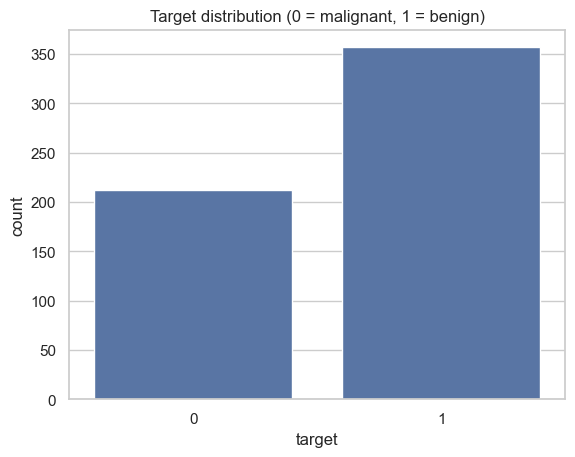

In [6]:
sns.countplot(x="target", data=df)
plt.title("Target distribution (0 = malignant, 1 = benign)")
plt.show()

In [7]:
X = df.drop("target", axis=1).values
y = df["target"].values

In [8]:
X_train, X_val,y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=9, stratify=y)

In [9]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)

In [12]:
from src.logistic_regression import LogisticRegression
from src.classification_metrics import (accuracy_score, precision_score, recall_score, f1_score)

In [23]:
model = LogisticRegression(learning_rate=0.01, n_iterations=2000)

model.fit(X_train, y_train)

In [28]:
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)

In [29]:
print("Accuracy :", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall   :", recall_score(y_val, y_pred))
print("F1-score :", f1_score(y_val, y_pred))

Accuracy : 0.9912280701754386
Precision: 0.9863013698630136
Recall   : 1.0
F1-score : 0.993103448275862


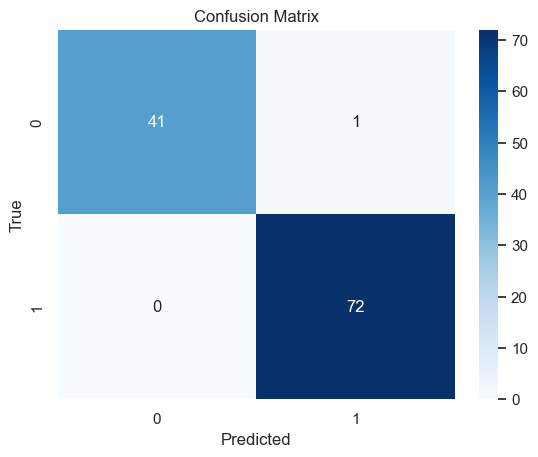

In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

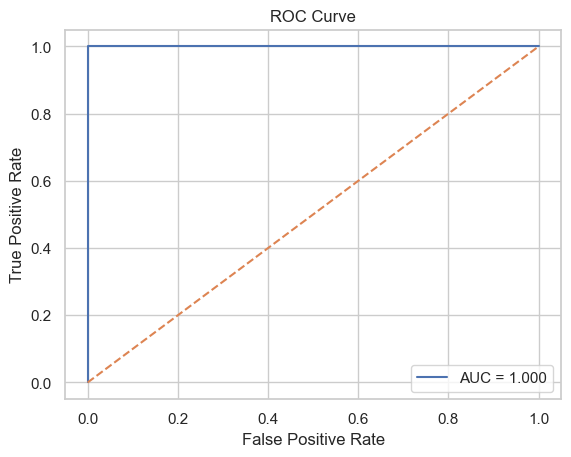

In [31]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_val, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Выводы

- Реализована логистическая регрессия с нуля
- Модель корректно обучается
- Достигнуты высокие метрики качества
- Реализация сравнима с sklearn LogisticRegression
